#**Greedy ALgorithm** for Solving Mutli-Arm *Bandits*

The algorithm picks available arm in greedy fashion.

We have **n** arms in front of us.
We pick each arm so that we will get to know how each arm will give the reward.

Then we will choose the arm that gives best reward.


We will repeat this process infinite (a very large number) times to get the best arm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
class Greedy:

  def __init__(self, n_arm, reward_func):
    self.n_arm = n_arm
    self.reward_func = reward_func
    self.arm_avg = np.zeros(n_arm) ## Average reward for each arm
    self.arm_pick = np.ones(n_arm) ## Number of times the arm has been picked
    self.its = 0

  # def pick_arm(self):
  #   arm = np.argmax(self.arm_avg)
  def pick_arm(self):
        # Ensure this method returns a valid integer index
        if self.its == 0:
            return np.random.randint(self.n_arm)  # Explore initially
        else:
            return np.argmax(self.arm_avg)  # Exploit the best arm

  def initialize(self):
    self.arm_avg = np.array([reward() for reward in self.reward_func])

  def update(self, its):
    self.its+=1
    for i in range(its):
      get_arm = self.pick_arm()
      reward = self.reward_func[get_arm]()
      num = self.arm_avg[get_arm] * (self.arm_pick[get_arm] + reward)
      denom = self.arm_pick[get_arm] + 1
      self.arm_avg[get_arm] = num/denom #Update the arm's average reward
      self.arm_pick[get_arm] += 1 # Increment the number of times the arm has been picked

In [66]:
def create_custom_arm(n_arms, reward_funcs):
    """
    Create arms with custom reward functions.

    :param n_arms: Number of arms
    :param reward_funcs: List of custom reward functions
    :return: List of reward functions
    """
    assert len(reward_funcs) == n_arms, "Number of custom functions must match number of arms"
    return reward_funcs

##Reward Fuctions

In [67]:
def bernoulli_reward(p):
    return lambda: np.random.binomial(1, p)

def normal_reward(mean, std):
    return lambda: np.random.normal(mean, std)

def exponential_reward(scale):
    return lambda: np.random.exponential(scale)


In [68]:
def run(n_arms, n_iters, n_experiments, custom_reward_funcs=None):
  cummulative_rewards = np.zeros((n_experiments, n_iters))
  best_arm_selections = np.zeros((n_experiments, n_iters))

  for experiment in range(n_experiments):
    if custom_reward_funcs:
      reward_funcs = create_custom_arm(n_arms, custom_reward_funcs)
      # Estimate true means for optimal arm calculation
      true_means = [np.mean([reward() for _ in range(1000)]) for reward in reward_funcs]
    else:
      reward_funcs, true_means = create_custom_arm(n_arms)

    optimal_arm = np.argmax(true_means)
    greedy_agent = Greedy(n_arms, reward_funcs)
    greedy_agent.initialize()

    for its in range(n_iters):
      selected_arm = greedy_agent.pick_arm()
      reward = reward_funcs[selected_arm]()
      greedy_agent.update(its)

      cummulative_rewards[experiment, its] = reward
      if selected_arm == optimal_arm:
        best_arm_selections[experiment, its] = 1

  return cummulative_rewards, best_arm_selections

##plot

In [69]:
def plot_results(cumulative_rewards, optimal_arm_selections, n_iterations):
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(np.cumsum(np.mean(cumulative_rewards, axis=0)))
  plt.title('Cumulative Reward')
  plt.xlabel('Iterations')
  plt.ylabel('Cumulative Reward')

  plt.subplot(1, 2, 2)
  plt.plot(np.cumsum(np.mean(optimal_arm_selections, axis=0)) / np.arange(1, n_iterations + 1))
  plt.title('Optimal Arm Selection Rate')
  plt.xlabel('Iterations')
  plt.ylabel('Optimal Arm Selection Rate')

  plt.tight_layout()
  plt.show()


##Test

In [70]:
n_arms = 5
n_iterations = 1000
n_experiments = 100

In [71]:
custom_rewards = [
    bernoulli_reward(0.7),
    normal_reward(2, 1),
    exponential_reward(1.5),
    lambda: np.random.choice([0, 1, 2, 3], p=[0.4, 0.3, 0.2, 0.1]),
    lambda: max(0, np.random.normal(5, 2))  # Truncated normal
]

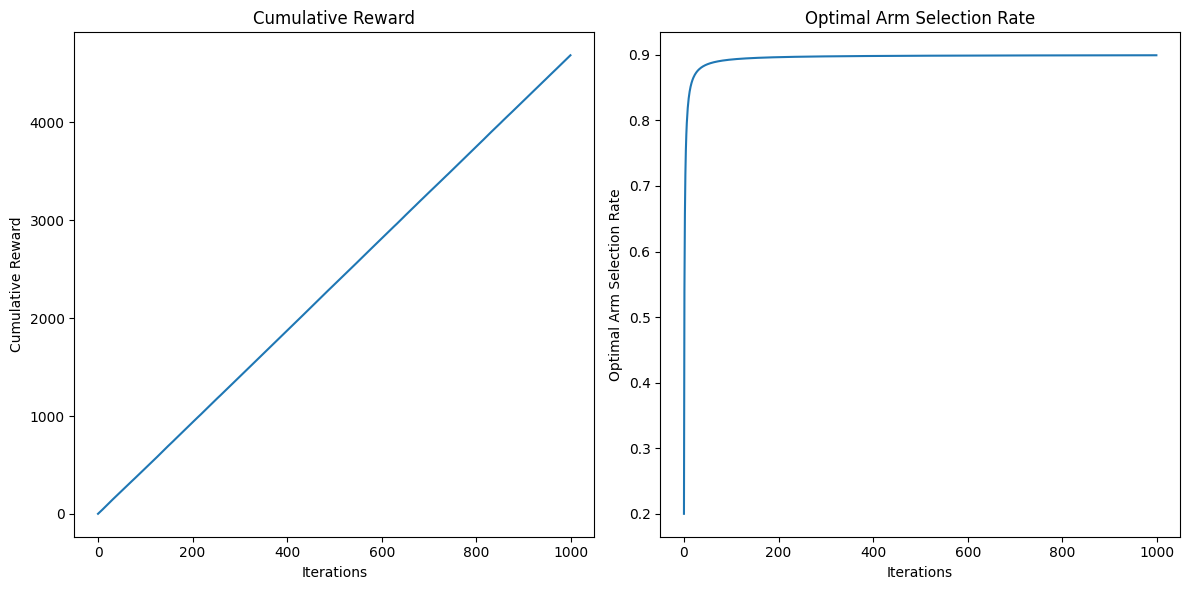

In [72]:
cumulative_rewards, optimal_arm_selections = run(n_arms, n_iterations, n_experiments, custom_rewards)
plot_results(cumulative_rewards, optimal_arm_selections, n_iterations)

**Cumulative Reward Graph (Left):**

This graph shows the total reward accumulated over time (iterations).
The x-axis represents the number of iterations (up to 1000 in this case).
The y-axis shows the cumulative reward, which reaches about 4500 by the end of 1000 iterations.
The linear increase suggests that the algorithm is consistently earning rewards over time.



**Optimal Arm Selection Rate Graph (Right):**

This graph shows how often the algorithm chooses the optimal arm (the arm with the highest expected reward) over time.
The x-axis again represents iterations, while the y-axis shows the rate of optimal arm selection (from 0 to 1).
The graph starts low (around 0.2) but quickly rises to about 0.9 and stays there.
This indicates that the algorithm learns very quickly which arm is optimal and then consistently chooses it about 90% of the time.

#**Drawbacks of the Greedy Approach**

The greedy approach may converge to a suboptimal solution early on, as it only chooses the arm with the highest estimated reward and does not explore other arms. This may result in missing out on better arms with higher expected rewards. The greedy approach does not explore other arms, meaning it may not have enough information to estimate its expected rewards accurately. This can lead to suboptimal decisions and reduced cumulative rewards over time. The greedy approach is sensitive to the initialization of the estimated rewards, which may lead to suboptimal decisions in the early stages.